<a href="https://colab.research.google.com/github/yuju1998/A-Search-520/blob/main/Data/Plots-and-Analysis/Voyage_to_the_Unknown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import github2pypi
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
#!git clone https://github.com/PietropaoloV/A-Search-520.git

In [3]:
path = ".."
files = os.listdir(path)
files.sort()
del files[0] # remove notebook directory from file listing

# Question 4

In [4]:
q4 = pd.read_csv(path + "/" + files[0])

print(path + "/" + files[0])

../Q4-AStar-Manhattan-NoBumps-Results.csv


<AxesSubplot:xlabel='Probability', ylabel='Solvable %'>

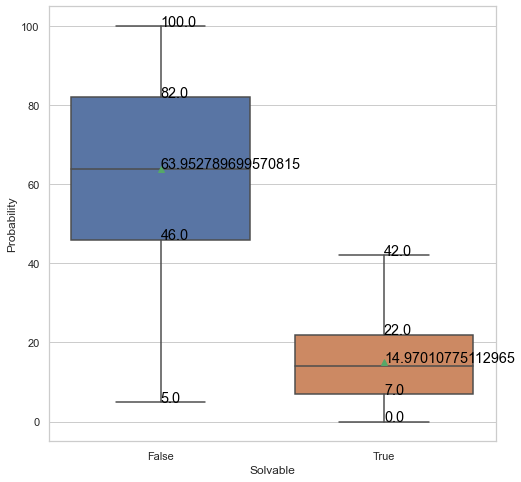

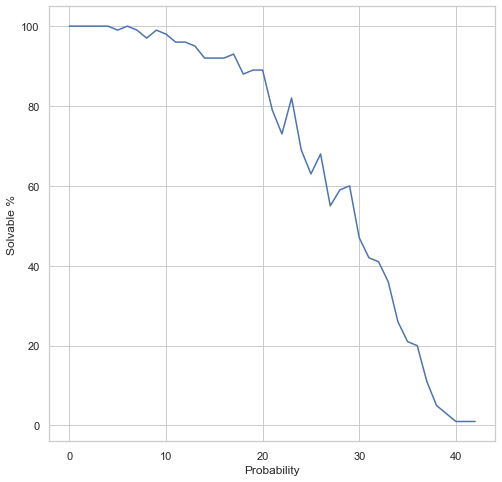

In [5]:
# Plot for Question 4
plt.figure(figsize = (8, 8))
q4_box = sns.boxplot(x=q4['Solvable'], y=q4['Probability'], showmeans=True)
q4_mean = q4.groupby(['Solvable'])['Probability'].mean()
q4_summary = q4.groupby(['Solvable'])['Probability'].quantile([0,0.25,0.5,0.75,1])

#print(q4_mean, q4_summary)

for xtick in q4_box.get_xticks():
   q4_box.text(xtick, q4_summary[xtick][0], str(q4_summary[xtick][0]), size='large', color='black')
   q4_box.text(xtick, q4_summary[xtick][0.25], str(q4_summary[xtick][0.25]), size='large', color='black')
   q4_box.text(xtick, q4_summary[xtick][0.75], str(q4_summary[xtick][0.75]), size='large', color='black')
   q4_box.text(xtick, q4_summary[xtick][1], str(q4_summary[xtick][1]), size='large', color='black')
   q4_box.text(xtick, q4_mean[xtick], str(q4_mean[xtick]), size='large', color='black')

# print graph of probability vs solvable %
plt.figure(figsize = (8, 8))
q4[q4["Solvable"]]["Probability"].value_counts().sort_index().plot(xlabel="Probability", ylabel="Solvable %")

# Question 5

In [6]:
q5_c = pd.read_csv(path + "/" + files[1])
q5_e = pd.read_csv(path + "/" + files[2])
q5_m = pd.read_csv(path + "/" + files[3])

print(path + "/" + files[1])
print(path + "/" + files[2])
print(path + "/" + files[3])

q5_c_repeat = pd.read_csv(path + "/" + files[4])
q5_e_repeat = pd.read_csv(path + "/" + files[5])
q5_m_repeat = pd.read_csv(path + "/" + files[6])

print(path + "/" + files[4])
print(path + "/" + files[5])
print(path + "/" + files[6])

../Q5-AStar-Chebyshev-NoBumps-Results.csv
../Q5-AStar-Euclidean-NoBumps-Results.csv
../Q5-AStar-Manhattan-NoBumps-Results.csv
../Q5-RepeatedAStar-Chebyshev-NoBumps-Results.csv
../Q5-RepeatedAStar-Euclidean-NoBumps-Results.csv
../Q5-RepeatedAStar-Manhattan-NoBumps-Results.csv


## Regular A-star

### Number of Cells Processed

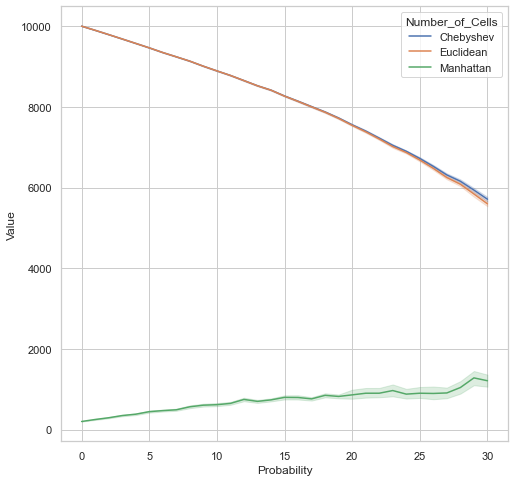

In [7]:
q5_cells = pd.concat([q5_c['Probability'], \
                      q5_c['Number of Cells Processed'].rename('Chebyshev'), \
                      q5_e['Number of Cells Processed'].rename('Euclidean'), \
                      q5_m['Number of Cells Processed'].rename('Manhattan')], axis=1)
q5_cells = q5_cells.melt('Probability', var_name='Number_of_Cells', value_name='Value')
#print(q5_cells)
plt.figure(figsize=(8, 8))
q5_cells_line = sns.lineplot(x=q5_cells['Probability'], y=q5_cells['Value'], hue=q5_cells['Number_of_Cells'])

### Runtime

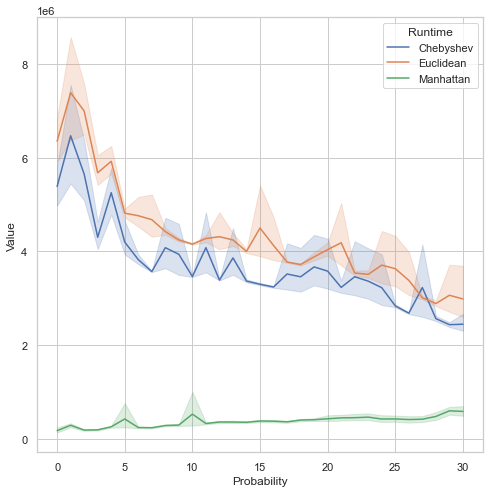

In [8]:
q5_time = pd.concat([q5_c['Probability'], \
                     q5_c['Runtime'].rename('Chebyshev'), \
                     q5_e['Runtime'].rename('Euclidean'), \
                     q5_m['Runtime'].rename('Manhattan')], axis=1)
q5_time = q5_time.melt('Probability', var_name='Runtime', value_name='Value')
#print(q5_time)
plt.figure(figsize=(8, 8))
q5_time_line = sns.lineplot(x=q5_time['Probability'], y=q5_time['Value'], hue=q5_time['Runtime'])

## Repeated A-star

### Path length

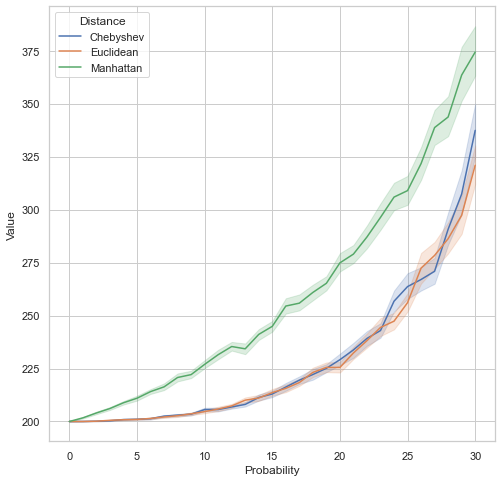

In [9]:
q5_astar = pd.concat([q5_c_repeat['Probability'], \
                      q5_c_repeat['Path Length (Repeated A*'].rename('Chebyshev'), \
                      q5_e_repeat['Path Length (Repeated A*'].rename('Euclidean'), \
                      q5_m_repeat['Path Length (Repeated A*'].rename('Manhattan')], axis=1)
q5_astar = q5_astar.melt('Probability', var_name='Distance', value_name='Value')
#print(q5_astar)
plt.figure(figsize=(8, 8))
q5_astar_line = sns.lineplot(x=q5_astar['Probability'], y=q5_astar['Value'], hue=q5_astar['Distance'])

### Number of Cells Processed

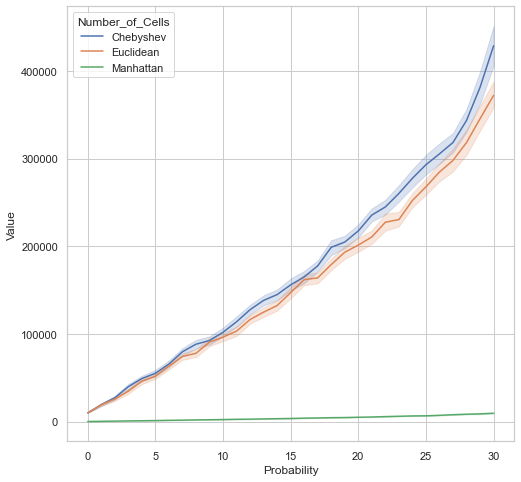

In [10]:
q5_cells = pd.concat([q5_c_repeat['Probability'], \
                      q5_c_repeat['Number of Cells Processed'].rename('Chebyshev'), \
                      q5_e_repeat['Number of Cells Processed'].rename('Euclidean'), \
                      q5_m_repeat['Number of Cells Processed'].rename('Manhattan')], axis=1)
q5_cells = q5_cells.melt('Probability', var_name='Number_of_Cells', value_name='Value')
#print(q5_cells)
plt.figure(figsize=(8, 8))
q5_cells_line = sns.lineplot(x=q5_cells['Probability'], y=q5_cells['Value'], hue=q5_cells['Number_of_Cells'])

### Runtime

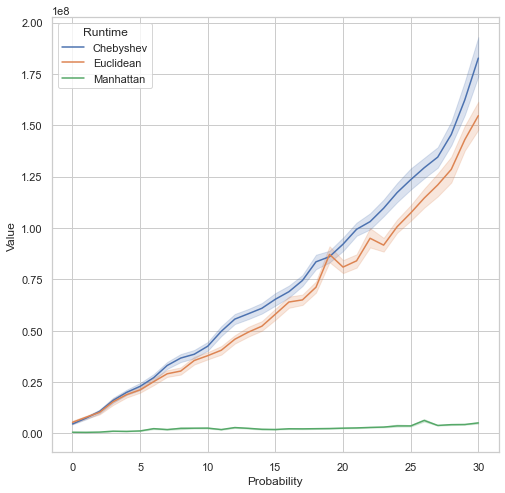

In [11]:
q5_time = pd.concat([q5_c_repeat['Probability'], \
                     q5_c_repeat['Runtime'].rename('Chebyshev'), \
                     q5_e_repeat['Runtime'].rename('Euclidean'), \
                     q5_m_repeat['Runtime'].rename('Manhattan')], axis=1)
q5_time = q5_time.melt('Probability', var_name='Runtime', value_name='Value')
#print(q5_time)
plt.figure(figsize=(8, 8))
q5_time_line = sns.lineplot(x=q5_time['Probability'], y=q5_time['Value'], hue=q5_time['Runtime'])